In [ ]:
from google.colab import files



In [ ]:
import pandas as pd
import io
import numpy as np

# Assuming the file is named 'Customer_Data.csv'
uploaded = files.upload()
df= pd.read_csv(next(iter(uploaded.keys())))

Saving Customer_Data.csv to Customer_Data (2).csv


In [ ]:
print("Data Information:")
print(df.info())

print("\nData Description:")
print(df.describe())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88810 entries, 0 to 88809
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             88810 non-null  int64  
 1   Customer_Status         88810 non-null  object 
 2   Old_Class               88810 non-null  object 
 3   Geographical_ID         88810 non-null  int64  
 4   CustCreationDate        88810 non-null  object 
 5   Net_ Purchase           88810 non-null  float64
 6   Avg_Invoice_Row_No      88810 non-null  float64
 7   Waste_Rate              88810 non-null  float64
 8   Rejected_Rate           88810 non-null  float64
 9   Avg_Purchase_In_Month   88810 non-null  int64  
 10  Date_Of_Last_ Purchase  88591 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 7.5+ MB
None

Data Description:
         Customer_ID  Geographical_ID  Net_ Purchase  Avg_Invoice_Row_No  \
count   88810.000000  

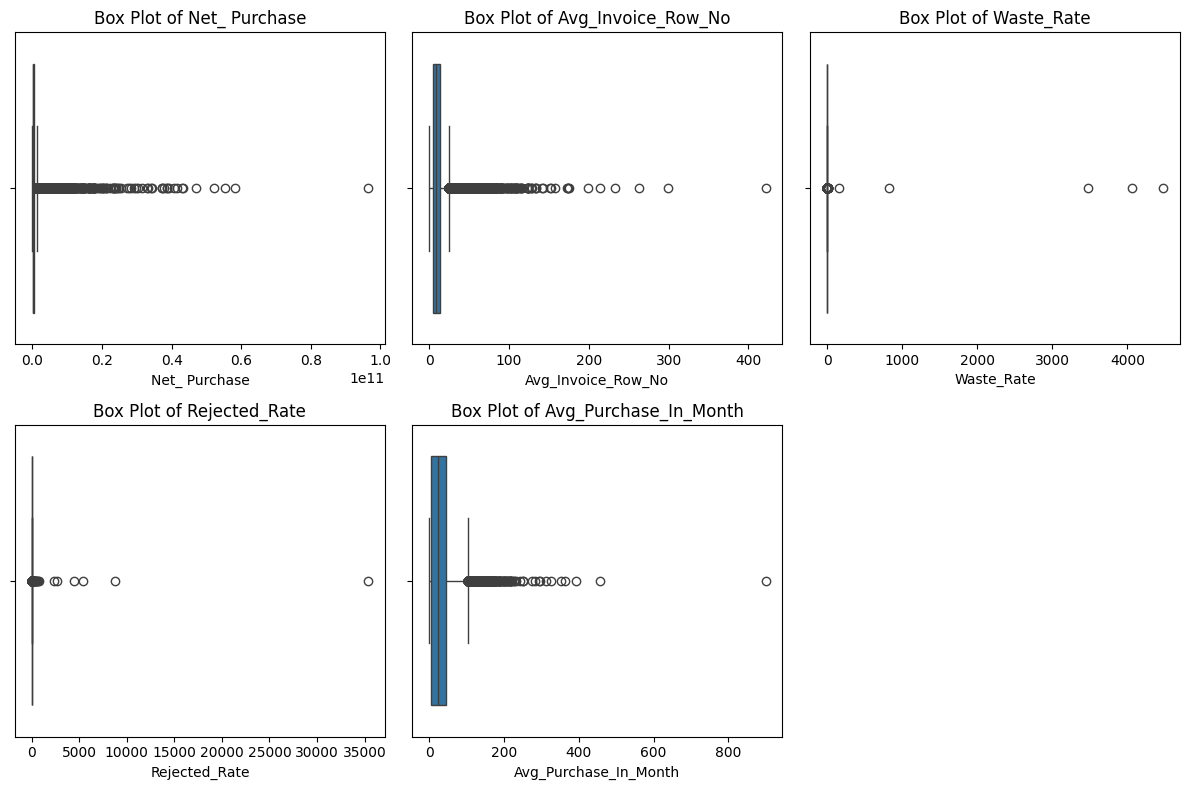

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
num_cols = ['Net_ Purchase', 'Avg_Invoice_Row_No', 'Waste_Rate',
            'Rejected_Rate', 'Avg_Purchase_In_Month']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and it's already loaded
# List of columns to check for outliers
cols = ['Net_ Purchase', 'Avg_Invoice_Row_No', 'Waste_Rate', 'Rejected_Rate', 'Avg_Purchase_In_Month']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers and keep only valid cases
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


New DataFrame shape: (61438, 11)


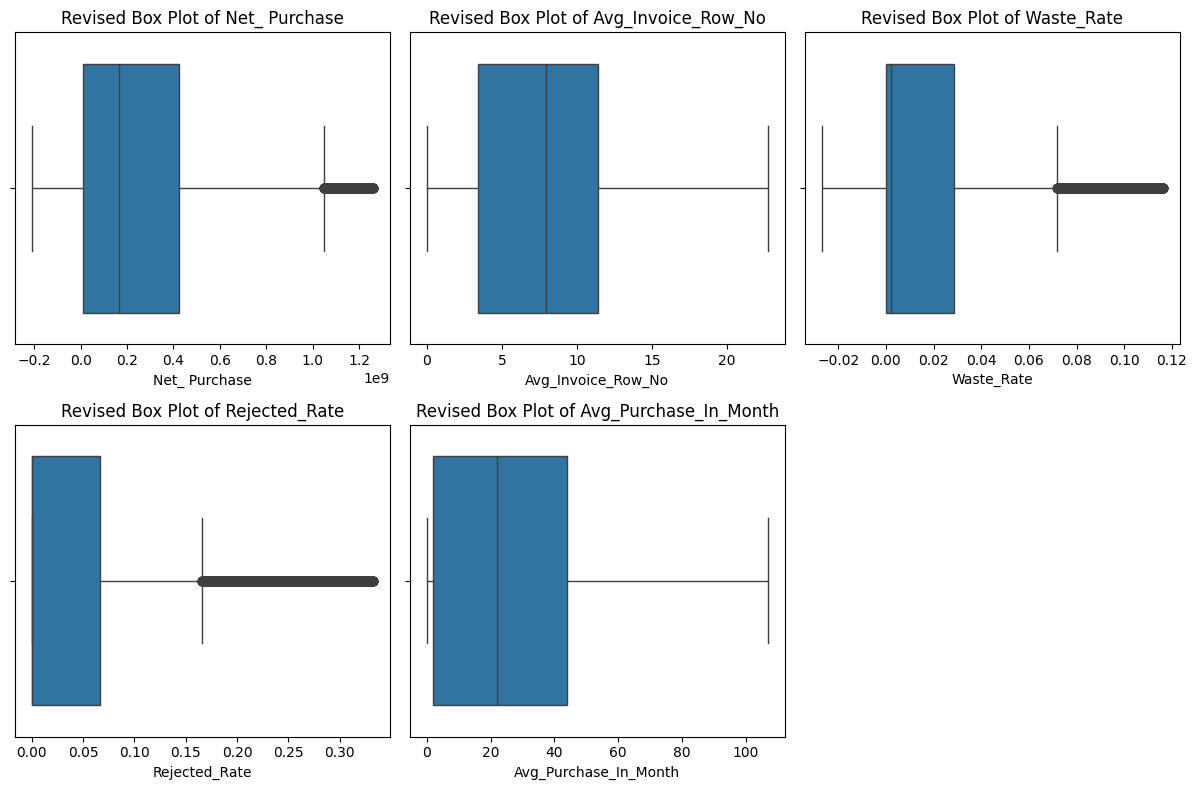

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the shape of the new DataFrame
print("New DataFrame shape:", df.shape)

# Plot revised box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Revised Box Plot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and it's already cleaned from previous steps
# Select columns relevant for clustering
features = ['Net_ Purchase', 'Avg_Invoice_Row_No', 'Waste_Rate', 'Rejected_Rate', 'Avg_Purchase_In_Month']
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


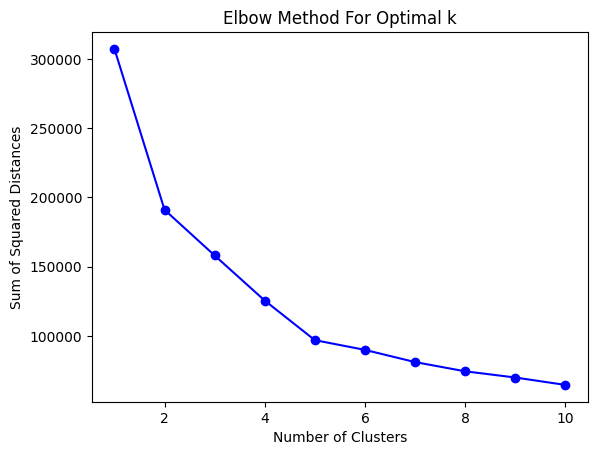

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculating the sum of squared distances for k values from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), ssd, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [ ]:
# Assuming the elbow point is at k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Assigning the clusters to each instance
df['cluster'] = kmeans.labels_


         Net_ Purchase  Avg_Invoice_Row_No  Waste_Rate  Rejected_Rate  \
cluster                                                                 
0         2.944453e+08            9.451849    0.072686       0.073364   
1         1.392441e+07            1.652476    0.000707       0.001374   
2         2.235574e+08           10.004995    0.009518       0.079616   
3         7.667635e+08           12.817379    0.023805       0.048008   

         Avg_Purchase_In_Month  
cluster                         
0                    33.774204  
1                     2.784747  
2                    27.353061  
3                    57.896583  


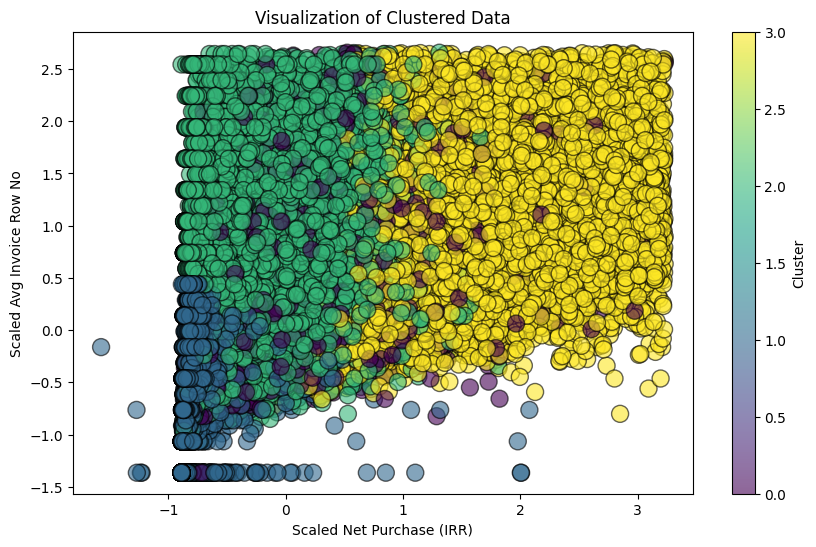

In [ ]:
# Analyze the mean values of features in each cluster
cluster_analysis = df.groupby('cluster')[features].mean()
print(cluster_analysis)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=150, alpha=0.6)
plt.title('Visualization of Clustered Data')
plt.xlabel('Scaled Net Purchase (IRR)')
plt.ylabel('Scaled Avg Invoice Row No')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and you've already loaded your data
features = ['Net_ Purchase', 'Avg_Invoice_Row_No', 'Waste_Rate', 'Rejected_Rate', 'Avg_Purchase_In_Month']
X = df[features]

# Normalizing the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert normalized data back to a DataFrame for easier handling
X_norm_df = pd.DataFrame(X_normalized, columns=features)


In [ ]:
from sklearn.decomposition import PCA

# Create a PCA instance: let's start with 2 components for visualization purposes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_norm_df)

# Convert the principal components into a pandas DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])


In [ ]:
# Explained variance by each component
print("Explained variance by each component: ", pca.explained_variance_ratio_)

# Cumulative variance explained
import numpy as np
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative variance explained: ", cumulative_variance)


Explained variance by each component:  [0.53291866 0.20052988]
Cumulative variance explained:  [0.53291866 0.73344855]


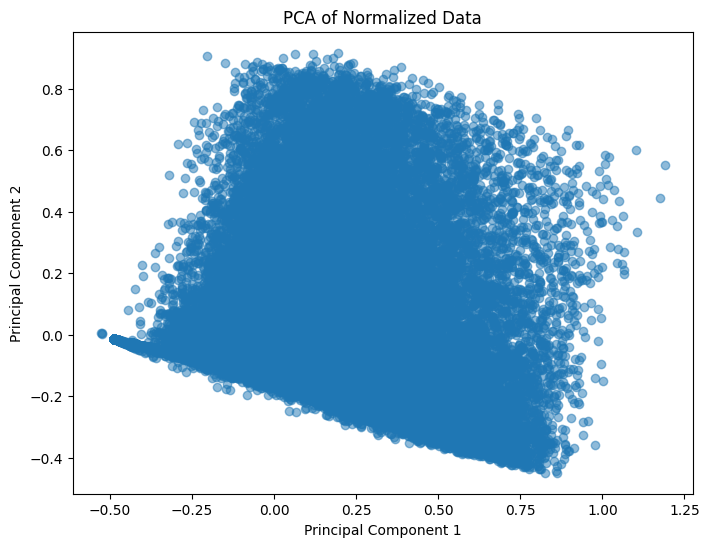

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Normalized Data')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Assuming 'df' is your initial DataFrame with the relevant features
features = ['Net_ Purchase', 'Avg_Invoice_Row_No', 'Waste_Rate', 'Rejected_Rate', 'Avg_Purchase_In_Month']
X = df[features]

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Adjust components according to your previous analysis
X_pca = pca.fit_transform(X_normalized)


In [ ]:
# Choose the number of clusters
k = 4  # Change based on your analysis
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Assign clusters back to our DataFrame
df['cluster'] = kmeans.labels_


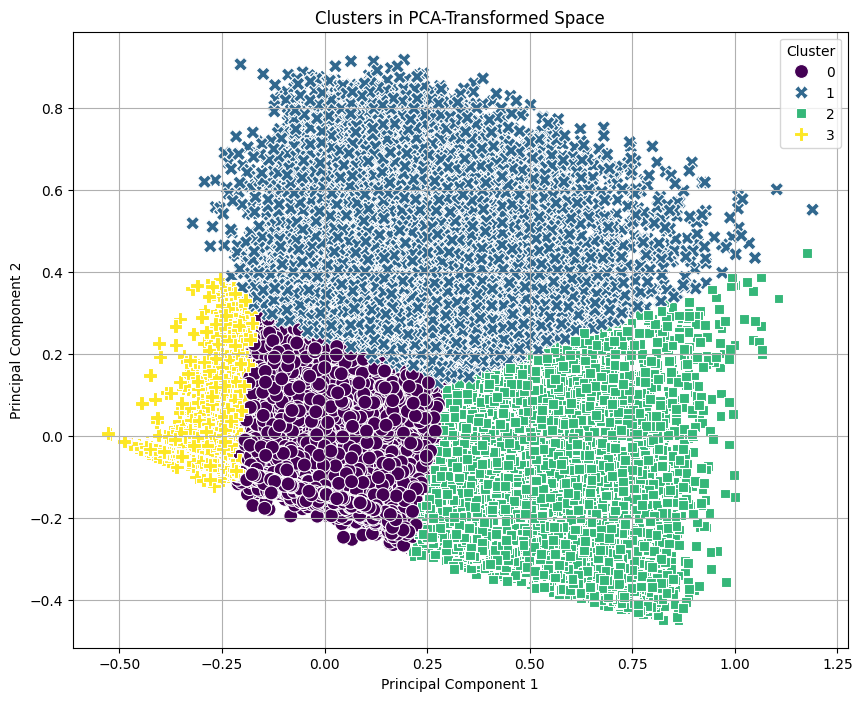

Cluster Centroids on Principal Components:
 [[ 0.02523143 -0.07193675]
 [ 0.22491343  0.44507387]
 [ 0.46696256 -0.16768012]
 [-0.43732553 -0.02134112]]
Cluster Centroids in Original Feature Space:
 [[ 3.17047951e+08  8.28497268e+00  1.88390811e-02  2.63268443e-02
   2.85356873e+01]
 [ 2.70761110e+08  9.15957445e+00  3.14010465e-02  2.07040077e-01
   3.28480524e+01]
 [ 6.79700555e+08  1.43313364e+01  3.50909164e-02  3.64183742e-02
   5.45009719e+01]
 [-4.40691435e+07  2.11828716e+00  1.35876653e-03  1.46275937e-04
   2.00437118e+00]]


In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', style=df['cluster'], s=100)
plt.title('Clusters in PCA-Transformed Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Analyze cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids on Principal Components:\n", centroids)
# Optional: Inverse transform centroids to original feature space (if insightful)
centroids_original_space = scaler.inverse_transform(pca.inverse_transform(centroids))
print("Cluster Centroids in Original Feature Space:\n", centroids_original_space)